In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
np.set_printoptions(suppress=True)


In [2]:
listings_with_distances = pd.read_csv('../data/curated/listings_with_distances.csv')
school_distances = pd.read_csv('../data/curated/Closest_and_average_dist_school.csv')


In [3]:
listings_with_distances.drop(list(listings_with_distances.filter(regex='Unnamed')), axis=1, inplace=True)
school_distances.drop(list(school_distances.filter(regex='Unnamed')), axis=1, inplace=True)

In [4]:
listings_df = listings_with_distances.merge(school_distances, how='inner', left_on='id',right_on='listing_id').drop(['title', 'listing_id', 'Coordinates'], axis=1)
listings_df.to_csv('../data/curated/listings_distances.csv', index=True)

# drop useless features for this purpose
listings_df.drop(['address', 'Latitude', 'Longitude', 'status', 'bond'], axis=1, inplace=True)

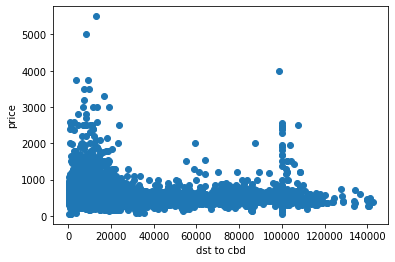

In [5]:
plt.scatter(listings_df.DstToCBD, listings_df.price)
plt.xlabel('dst to cbd')
plt.ylabel('price')
plt.show()

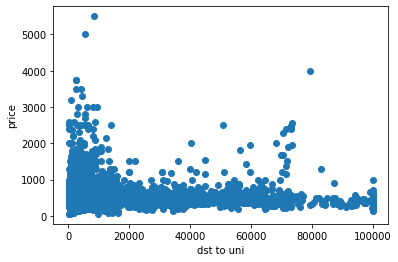

In [6]:
plt.scatter(listings_df.ClosestDstToUni, listings_df.price)
plt.xlabel('dst to uni')
plt.ylabel('price')
plt.show()


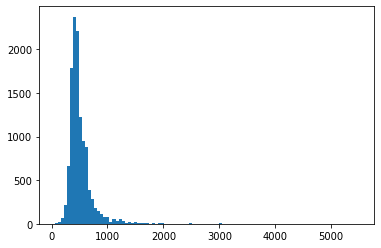

In [7]:
plt.hist(listings_df.price, bins=100);

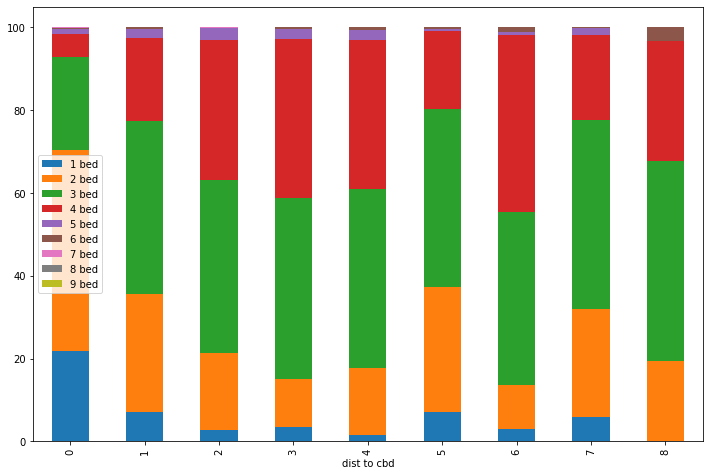

In [8]:
listings_df.DstToCBD.describe()
# 142600 is the max dist from cbd
buckets = range(0, 142600, int(142600/10))

listilist = np.zeros([len(buckets)-1, 9])

for i in range(len(buckets)-1):
    tempdf = listings_df[listings_df.DstToCBD.between(buckets[i], buckets[i+1])]
    #print(tempdf.beds.value_counts().sort_index())
    for beds, cnt in tempdf.beds.value_counts().items():
        listilist[i][beds-1] = cnt
#print(listilist)
asidf = pd.DataFrame(listilist, columns=[str(x)+' bed' for x in range(1, 10)])
asidf = asidf.apply(lambda x: x*100/sum(x), axis=1)

asidf.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.xlabel('dist to cbd')
plt.show()

<AxesSubplot:xlabel='beds', ylabel='avg price'>

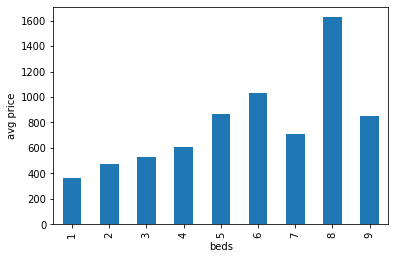

In [9]:
listings_df.groupby('beds').price.agg('mean').plot(kind='bar', ylabel='avg price', xlabel='beds')

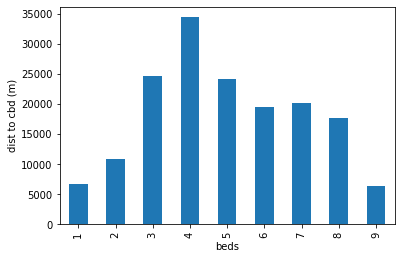

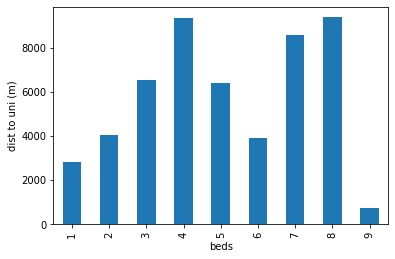

<AxesSubplot:xlabel='beds', ylabel='dist to shops (m)'>

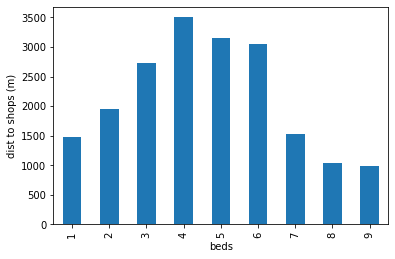

In [10]:
listings_df.groupby('beds').DstToCBD.agg('median').plot(kind='bar', xlabel='beds', ylabel='dist to cbd (m)')
plt.show()
listings_df.groupby('beds').ClosestDstToUni.agg('median').plot(kind='bar', xlabel='beds', ylabel='dist to uni (m)')
plt.show()
listings_df.groupby('beds').ClosestDstToShoppingCentre.agg('median').plot(kind='bar', xlabel='beds', ylabel='dist to shops (m)')

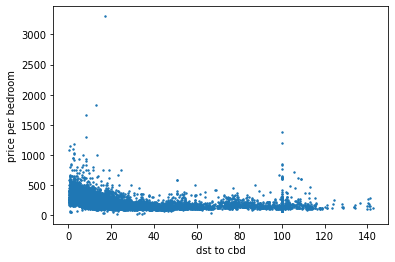

In [26]:
# Price per bedroom
listings_df['price_bedroom'] = listings_df.price / listings_df.beds
# listings_df.price_bedroom.plot(kind='bar')
plt.scatter(listings_df.DstToCBD/1000, listings_df.price_bedroom, s=2)
plt.xlabel('dst to cbd')
plt.ylabel('price per bedroom')
plt.show()

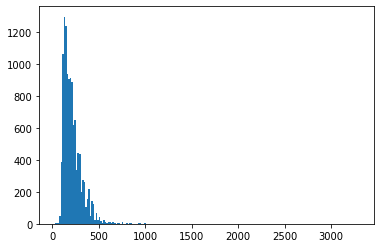

In [21]:
plt.hist(listings_df.price_bedroom, bins=200);

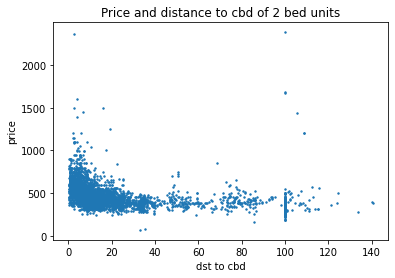

In [33]:
tempdf = listings_df[listings_df.beds == 2]
plt.scatter(tempdf.DstToCBD/1000, tempdf.price, s=2)
plt.xlabel('dst to cbd')
plt.ylabel('price')
plt.title('Price and distance to cbd of 2 bed units')
plt.show()